# Analyzing Marketing Channel A/B Test Results with Python

A/B Testing consists of running an experiment to compare the results of a test and control group. A test group might contain a particular change or variable that we want to test against the control group to see if there is a statistically significant change in the test variable. 

Often times we will run a/b testing in all sorts of marketing campaigns which may include web landing pages, email marketing templates, or paid search campaigns to test different variables against a control group. Fortune 500 companies like Amazon and Google run as many as 10,000 a/b tests every year. Always testing web design changes, customer order flows, or color changes to see if there is an improvement in customer conversion rates or other metrics that may be used to track the results of the A/B test campaign. 

Here we will analyze a marketing campaign with a/b testing to see what information we can gain from the a/b test analysis and recommendations we can make moving forward.

We will begin by importing the necessary python packages and libraries

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib as plt


We will read the csv file and explore the dataset

In [2]:
df = pd.read_csv('marketing_new.csv')
df.head()

,Unnamed: 0,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
0,0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
1,1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
2,2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
3,3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
4,4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes


Explore the dataset columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10037 non-null  int64  
 1   user_id              10037 non-null  object 
 2   date_served          10021 non-null  object 
 3   marketing_channel    10022 non-null  object 
 4   variant              10037 non-null  object 
 5   converted            10037 non-null  bool   
 6   language_displayed   10037 non-null  object 
 7   language_preferred   10037 non-null  object 
 8   age_group            10037 non-null  object 
 9   date_subscribed      1856 non-null   object 
 10  date_canceled        577 non-null    object 
 11  subscribing_channel  1856 non-null   object 
 12  is_retained          10037 non-null  bool   
 13  DoW                  1856 non-null   float64
 14  channel_code         1856 non-null   float64
 15  is_correct_lang      10037 non-null 

In [4]:
df.variant.unique()

array(['personalization', 'control'], dtype=object)

In [5]:
df.user_id.shape[0]

10037

We have an 'Unnamed: 0' column that we need to drop and setting inplace equal to True to make the change in the underlying data file

In [6]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

What is the number of unique users in the dataset?

In [7]:
df.user_id.nunique()

7309

What is the overall conversion rate of the marketing dataset?

In [8]:
df.converted.mean()

0.10869781807312942

What is the converion rate by marketing channel?

In [9]:
df.groupby(['marketing_channel'])['converted'].mean()

marketing_channel
Email        0.341593
Facebook     0.127419
House Ads    0.062962
Instagram    0.141635
Push         0.083585
Name: converted, dtype: float64

Now we can see the conversion rates of each marketing channel and compare the performance of the ads across the different marketing channels. Since we are interested in comparing the conversion rates of the a/b test campaigns we will also want to a second group by along the variant column.

In [10]:
df.groupby(['marketing_channel', 'variant'])['converted'].mean()

marketing_channel  variant        
Email              control            0.291971
                   personalization    0.388316
Facebook           control            0.058166
                   personalization    0.191511
House Ads          control            0.067398
                   personalization    0.057772
Instagram          control            0.058559
                   personalization    0.216684
Push               control            0.032051
                   personalization    0.129524
Name: converted, dtype: float64

Now we want to isolate the control group and add it to a new dataframe called df1

In [11]:
df1 = df.query('variant == "control"').groupby(['marketing_channel']).mean()

We also want to do the same for the personalization group and add it to a new dataframe called df2

In [12]:
df2 = df.query('variant == "personalization"').groupby(['marketing_channel']).mean()

In [13]:
#view = df1.groupby(['marketing_channel'])
df1.index

Index(['Email', 'Facebook', 'House Ads', 'Instagram', 'Push'], dtype='object', name='marketing_channel')

We are ready to plot the findings into a two column bar chart to present our findings of the a/b test on the marketing channels. The x axis we will place the marketing channels and y axis we will plot the conversion rates with higher bars equivalent to better conversion rates. We will compare the conversion rates of each channel side by side as indicated by the red(control) and yellow(personalization) bars. Finally we add the ticks and labels for each axis, a color legend, and an appropriate title to finish off the visualization. 

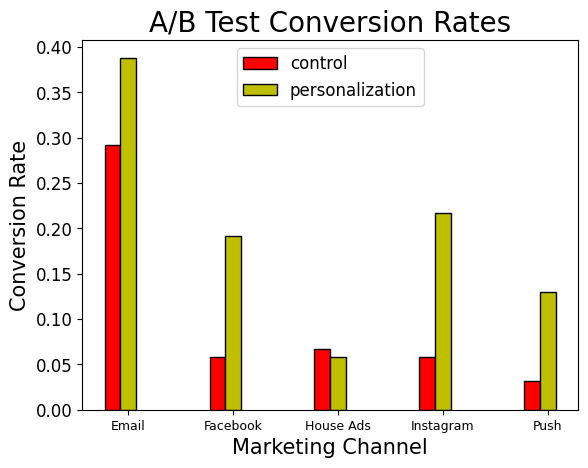

In [14]:
from matplotlib import pyplot as plt

# Set the width of the bars
wd = 0.3
x_pos = np.arange(1, 2*len(df1.index), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, df1['converted'], color='r', width=wd, edgecolor='k',
        label='control')
plt.bar(x_pos+wd, df2['converted'], color='y', width=wd, edgecolor='k', 
        label='personalization')

# Add xticks
plt.xticks(x_pos+wd, df1.index, fontsize=9)
plt.yticks(fontsize=12)
plt.title('A/B Test Conversion Rates', fontsize=20)
plt.xlabel('Marketing Channel', fontsize=15)
plt.ylabel('Conversion Rate', fontsize=15)

plt.legend(loc='upper center', fontsize=12)
plt.show()

# Recommendations and Next Steps

Based on the initial analysis of the a/b test we can see that the conversion rates of personalized advertisements across the different marketing channels yielded significantly better results, except for the House Ads marketing channel.

We might want to look at the House Ads advertisements to see why it is underperforming overall compared to the other channels

We might also be interested to see what types of personalizations are being done for each marketing channel to see what factors are contributing to the outperformance compared to the control groups

For further analysis it would be good to conduct statistical analysis on this dataset to test the null hypothesis and the statistical significance of these findings. The null hypothesis tests to see what the chances of the findings are due to chance alone. We want to prove that the null hypothesis is false with a p-value < 0.001. The lower the p-value the higher the probabily that we can reject the null hypothesis.

For more advanced analysis if we have the ad spend and revenue for each of these marketing channels, we can conduct a media mix model to help calculate the contribution of each marketing channel to the overall bottom line. This can be used to help inform the marketing team on the best allocation of marketing dollars for the optimal return on marketing investment (ROMI).

<a href="https://github.com/ahujaya/Analyze-AB-Test-Results-Python/blob/main/Analyze_AB_Test_Results.ipynb"> Source </a>